# Executive Summary

Traffic congestion is a problem in many cities around the world, it is especially bad in Los Angeles, ranked worst traffic in the world in a study (https://www.usatoday.com/story/money/2017/02/20/los-angeles-new-york-and-san-francisco-most-congested-us-cities/98133702/)

In this notebook, we seek to identify common traffic trends portrayed in the US Traffic 2015 dataset. With the common trends identified, we seek to create a predictive model that can predict for the total volume of traffic for a station in Los Angeles.

Predicting traffic information is an important task for various stakeholders from policy makers to ride sharing apps. The models created in this project serves as a preliminary approach to modelling road traffic volume.

To approach this dataset, we first identified potential features that can explain variations in traffic data. With these features, we conducted a bivariate analysis with traffic volumes to test the hypothesis. From the dataset, we observed 5 trends:

1) Weekend

2) Month

3) Holiday

4) Functional Classification

5) Road capacity

With the features identified, we created a predictive model using sklearn's Random Forest Regression, Ridge Regression and Support Vector Machine algorithms. We find the optimal model by gridsearching across suitable hyperparamters.

# Contents
- [Problem Statement](#ps)
- [Data Cleaning](#datacleaning)
- [Exploratory Data Analyis](#eda)
- [Modelling](#modelling)
- [Conclusion and Evaluation](#c&e)

<a id='ps'></a>
# Problem Statement

Identify patterns in the US 2015 Traffic dataset. Use machine learning tools to create a predictive model for traffic volume in Los Angeles.


### Import libraries and datasets

In [1]:
# Data Manipulation
import pandas as pd
import numpy as py
import numpy as np
import datetime  as dt

# Data Visualisation
import matplotlib.pyplot as plt 
import seaborn as sns
import folium
import holidays

# Machine Learning
from sklearn.model_selection import (train_test_split, cross_val_score, GridSearchCV)
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error 
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import  RandomForestRegressor
from sklearn.svm import SVR

# Others
import holidays

In [2]:
# import all necessary dataset 
traffic = pd.read_csv('dataset/dot_traffic_2015.txt.gz')
station = pd.read_csv('dataset/dot_traffic_stations_2015.txt.gz')


Due to Github 100mb upload limit, the file from Github will read this csv instead. Please run code below and skip to EDA section.

In [80]:
# df = pd.read_csv('dataset/filtered_dataset.csv')

In [3]:
# set display length for easy viewing
pd.options.display.max_rows=999
pd.options.display.max_columns=999

# set matplotlib font size
plt.rcParams.update({'font.size': 18})

<a id='datacleaning'></a>
# Data Cleaning

### Traffic Dataset

In [4]:
#Preview the traffic dataset
traffic.head(5)

date  day_of_data  day_of_week  direction_of_travel  \
0  2015-04-07            7            3                    1   
1  2015-09-26           26            7                    7   
2  2015-06-16           16            3                    3   
3  2015-04-26           26            1                    5   
4  2015-05-23           23            7                    3   

  direction_of_travel_name  fips_state_code functional_classification  \
0                    North               56                        3R   
1                     West               21                        1U   
2                     East                6                        1U   
3                    South               55                        1U   
4                     East                4                        4R   

           functional_classification_name  lane_of_travel  month_of_data  \
0       Rural: Principal Arterial - Other               1              4   
1  Urban: Principal Arterial - Interstate               2              9   
2  Urban: Principal Arterial - Interstate               0              6   
3  Urban: Principal Arterial - Interstate               1              4   
4                   Rural: Minor Arterial               0              5   

   record_type  restrictions station_id  \
0            3           NaN     000084   
1            3           NaN     056P94   
2            3           NaN     077590   
3            3           NaN     450001   
4            3           NaN     102210   

   traffic_volume_counted_after_0000_to_0100  \
0                                          4   
1                                        381   
2                                        585   
3                                        105   
4                                          6   

   traffic_volume_counted_after_0100_to_0200  \
0                                          3   
1                                        252   
2                                        408   
3                                         73   
4                                          4   

   traffic_volume_counted_after_0200_to_0300  \
0                                          2   
1                                        218   
2                                        328   
3                                         68   
4                                          2   

   traffic_volume_counted_after_0300_to_0400  \
0                                          4   
1                                        194   
2                                        364   
3                                         66   
4                                          3   

   traffic_volume_counted_after_0400_to_0500  \
0                                         43   
1                                        220   
2                                        696   
3                                         77   
4                                          1   

   traffic_volume_counted_after_0500_to_0600  \
0                                         78   
1                                        348   
2                                       1929   
3                                        113   
4                                         10   

   traffic_volume_counted_after_0600_to_0700  \
0                                        116   
1                                        453   
2                                       4228   
3                                        254   
4                                         17   

   traffic_volume_counted_after_0700_to_0800  \
0                                        144   
1                                        679   
2                                       5634   
3                                        367   
4                                         52   

   traffic_volume_counted_after_0800_to_0900  \
0                                        132   
1                                        826   
2            

In [5]:
#Convert train date to datetime format and set as index.
traffic['date'] = pd.to_datetime(traffic['date'])

In [6]:
#Check datatypes
traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7140391 entries, 0 to 7140390
Data columns (total 38 columns):
 #   Column                                     Dtype         
---  ------                                     -----         
 0   date                                       datetime64[ns]
 1   day_of_data                                int64         
 2   day_of_week                                int64         
 3   direction_of_travel                        int64         
 4   direction_of_travel_name                   object        
 5   fips_state_code                            int64         
 6   functional_classification                  object        
 7   functional_classification_name             object        
 8   lane_of_travel                             int64         
 9   month_of_data                              int64         
 10  record_type                                int64         
 11  restrictions                               float64       
 12  

In [7]:
#Check null values
traffic.isnull().sum()

date                                               0
day_of_data                                        0
day_of_week                                        0
direction_of_travel                                0
direction_of_travel_name                           0
fips_state_code                                    0
functional_classification                          0
functional_classification_name                     0
lane_of_travel                                     0
month_of_data                                      0
record_type                                        0
restrictions                                 7140391
station_id                                         0
traffic_volume_counted_after_0000_to_0100          0
traffic_volume_counted_after_0100_to_0200          0
traffic_volume_counted_after_0200_to_0300          0
traffic_volume_counted_after_0300_to_0400          0
traffic_volume_counted_after_0400_to_0500          0
traffic_volume_counted_after_0500_to_0600     

This dataset is relatively clean, with the expected datatypes and no null values out of the ordinary.

### Stations

In [8]:
# Count unique station_ids
traffic['station_id'].nunique()

5142

In [9]:
# Count of values
traffic['station_id'].value_counts()

000050    15013
000012    14845
000004    13843
000103    13460
000003    13152
          ...  
326122       12
008002        7
074870        2
074020        2
043340        1
Name: station_id, Length: 5142, dtype: int64

Each station has a different number of observations associated to them. This can be attributed to a few factors:

1) Number of lanes

From the dataset, we infer that each station may track multiple lanes of road, however the data from the lanes are captured in seperate observations in the dataset. We can differentiate the lanes with the feature 'lane_of_travel'.

2) Direction of travel

Similar to the lanes, some stations collect information on 2 way roads. The data collected from each direction is captured in its own observation. This is differentiated with the feature 'direction_of_travel'.

3) Dates

Some stations do not capture data on all the dates. Without additional information, we can only assume either the data is corrupted (device not able to capture information), no cars drove by or the station/ road was removed during the time period.

### Merge with station dataset

For this project, we will be limiting our scope to Los Angeles. Analysing traffic trends across all states may prove to be too broad to extract any meaningful patterns and trends in the data. Los Angeles is in the fips state code of 6 and fips county code of 37.

In [10]:
# Filter for Los Angeles state data
station = station[(station['fips_county_code'] == 37) & (station['fips_state_code'] == 6)]

In [11]:
station.head()

algorithm_of_vehicle_classification  \
43                                  NaN   
58                                  NaN   
81                                  NaN   
141                                 NaN   
143                                   G   

    algorithm_of_vehicle_classification_name calibration_of_weighing_system  \
43                                       NaN                            NaN   
58                                       NaN                            NaN   
81                                       NaN                            NaN   
141                                      NaN                            NaN   
143      Axle spacing with Scheme F modified                            NaN   

    calibration_of_weighing_system_name  \
43                                  NaN   
58                                  NaN   
81                                  NaN   
141                                 NaN   
143                                 NaN   

     classification_system_for_vehicle_classification  \
43                                                 13   
58                                                 13   
81                                                 13   
141                                                13   
143                                                15   

     concurrent_route_signing concurrent_signed_route_number  \
43                          3                            060   
58                          2                            101   
81                          1                            710   
141                         1                            110   
143                         2                            101   

     direction_of_travel direction_of_travel_name  fips_county_code  \
43                     3                     East                37   
58                     5                    South                37   
81                     1                    North                37   
141                    1                    North                37   
143                    1                    North                37   

     fips_state_code functional_classification  \
43                 6                        2U   
58                 6                        2U   
81                 6                        1U   
141                6                        1U   
143                6                        2U   

                        functional_classification_name hpms_sample_identifier  \
43   Urban: Principal Arterial - Other Freeways or ...                    NaN   
58   Urban: Principal Arterial - Other Freeways or ...                    NaN   
81              Urban: Principal Arterial - Interstate                    NaN   
141             Urban: Principal Arterial - Interstate                    NaN   
143  Urban: Principal Arterial - Other Freeways or ...                    NaN   

    hpms_sample_type  lane_of_travel       lane_of_travel_name   latitude  \
43                 N               6               Other lanes  34.030519   
58                 N               5               Other lanes  34.146921   
81                 N               1  Outside (rightmost) lane  33.856249   
141                N               3               Other lanes  33.771701   
143                N               1  Outside (rightmost) lane  40.897256   

      longitude lrs_identification  lrs_location_point  \
43   118.019692       00000000060R                 NaN   
58   118.781090       00000000101R                 NaN   
81   118.203473       00000000710R                 NaN   
141  118.279948       00000000110R                 NaN   
143  124.083293       00000000101R                 NaN   

     method_of_data_retrieval method_of_data_retrieval_name  \
43                          2         Automated (telemetry)   
58                          2         Automated (telemetry)   
81                          2         Automated (telemetry)   
141 

In [12]:
# Number of unique station_id

station['station_id'].nunique()

75

In [13]:
# Create merge dataset - merge on 4 condition
combined = traffic.merge(
    station,
    how = 'inner',
    on = ['station_id', 'direction_of_travel', 'lane_of_travel', 'functional_classification']
)

### Consolidate station data

To study the volume of traffic in each location, it would make sense to consolidate the multiple lane data. This will result in a clearer picture of the traffic volume.

Although different travel directions may have a different pattern in the data (e.g. moving towards and away of the city). It will require a great deal of data munging to extract meaningful insights from such a differenciation. As such merging the direction of travel will make sense for this project.

In [14]:
# Create feature for each station to get number of travel directions
station_info = combined.groupby(combined['station_id']).agg(
    travel_directions = ('direction_of_travel','nunique')
)

combined = combined.merge(
    station_info,
    how = 'left',
    on = 'station_id'
)

In [15]:
# Combine travel volume features across directions and 
# lanes for each station and each day

# Get volume features that will be summed
volume_features = combined.columns[13:37]

# Aggregating function
df = combined.groupby(['station_id','date']).agg(
    {
        cols: np.sum 
        if cols in volume_features 
        else 'first' 
        for cols in combined.columns
    }).reset_index(drop=True)

In [79]:
# Creating filtered dataset for Github upload
#df.to_csv('dataset/filtered_dataset.csv')

<a id='eda'></a>
# Exploratory Data Analysis

### Location - Geospacial visualisation

Provided in the dataset is the longitude and latitude of the stations. In this section we will be visualising the location of the station on a map with the Folium library.

In [16]:
# Summary statistics of longitude
df['longitude'].describe()

count    9991.000000
mean      118.327240
std         0.640016
min       117.730235
25%       118.098353
50%       118.203473
75%       118.371688
max       122.301588
Name: longitude, dtype: float64

In [17]:
# Check for station with null long lat
df[df['longitude'].isnull()]['station_id'].unique()

array([], dtype=object)

In [18]:
# Summary statistics of latitude
df['latitude'].describe()

count    9991.000000
mean       34.152026
std         0.591968
min        33.789785
25%        33.932235
50%        34.069662
75%        34.157933
max        37.993427
Name: latitude, dtype: float64

In [19]:
# Check outlier
df[df['latitude'] > 36]['station_location'].unique()

array(['N OF JR 1: PACIFIC COAST LA710'], dtype=object)

A station sticks out as an outlier in terms of its geographical cordinates. Upon checking the station location, it seems that this could be an error in the data. With a quick google search, PACIFIC COAST LA710 is located in Los Angeles (Reference: https://en.wikipedia.org/wiki/Interstate_710_and_State_Route_710_(California)). As such, we will not be dropping the observation.

In [20]:
# Get negative longitude 
df["longitude"] = df["longitude"] * -1

In [21]:
# Create folium map object
fol_map = folium.Map(location=[34.15, -118.32], zoom_start = 8)

In [22]:
# Create folium circlemarker object
df.apply(lambda obs:folium.CircleMarker(location=[obs["latitude"], obs["longitude"]], 
                                              radius=3)
                                             .add_to(fol_map), axis=1);

In [23]:
# Display folium map
fol_map

![Drag Racing](dataset/station_map.jpg)

From the map above, we see that the stations are spread out across Los Angeles.

When limiting the study to Los Angeles, the goal was to narrow the study such that the stations will capture characteristics unique to a smaller demographic of the US.

Los Angeles is very big on its own, further filtering could be done to study the traffic characteristics of a specific county.

### Traffic Volume

In this section we take a closer look at traffic volume. Traffic volume is the feature of interest in this project.

In [24]:
df.describe().T

count           mean  \
day_of_data                                       9991.0      15.607447   
day_of_week                                       9991.0       4.004204   
direction_of_travel                               9991.0       3.497648   
fips_state_code_x                                 9991.0       6.000000   
lane_of_travel                                    9991.0       0.132219   
month_of_data                                     9991.0       6.390852   
record_type_x                                     9991.0       3.000000   
restrictions                                         0.0            NaN   
traffic_volume_counted_after_0000_to_0100         9991.0    3048.703233   
traffic_volume_counted_after_0100_to_0200         9991.0    2287.458012   
traffic_volume_counted_after_0200_to_0300         9991.0    2035.695126   
traffic_volume_counted_after_0300_to_0400         9991.0    2199.850766   
traffic_volume_counted_after_0400_to_0500         9991.0    3679.583325   
traffic_volume_counted_after_0500_to_0600         9991.0    6544.498449   
traffic_volume_counted_after_0600_to_0700         9991.0    8280.776199   
traffic_volume_counted_after_0700_to_0800         9991.0    9265.538685   
traffic_volume_counted_after_0800_to_0900         9991.0    9352.102692   
traffic_volume_counted_after_0900_to_1000         9991.0    9249.292763   
traffic_volume_counted_after_1000_to_1100         9991.0    9431.841858   
traffic_volume_counted_after_1100_to_1200         9991.0    9702.067261   
traffic_volume_counted_after_1200_to_1300         9991.0    9950.757181   
traffic_volume_counted_after_1300_to_1400         9991.0   10162.745471   
traffic_volume_counted_after_1400_to_1500         9991.0   10370.791412   
traffic_volume_counted_after_1500_to_1600         9991.0   10360.299670   
traffic_volume_counted_after_1600_to_1700         9991.0   10286.678210   
traffic_volume_counted_after_1700_to_1800         9991.0   10164.381343   
traffic_volume_counted_after_1800_to_1900         9991.0    9588.468221   
traffic_volume_counted_after_1900_to_2000         9991.0    8573.420779   
traffic_volume_counted_after_2000_to_2100         9991.0    7508.118206   
traffic_volume_counted_after_2100_to_2200         9991.0    6851.037234   
traffic_volume_counted_after_2200_to_2300         9991.0    5831.977380   
traffic_volume_counted_after_2300_to_2400         9991.0    4349.972275   
year_of_data_x                                    9991.0      15.000000   
classification_system_for_vehicle_classification  9991.0      13.517266   
concurrent_route_signing                          9991.0       1.342108   
fips_county_code                                  9991.0      37.000000   
fips_state_code_y                                 9991.0       6.000000   
latitude                                          9991.0      34.152026   
longitude                                         9991.0    -118.327240   
lrs_location_point                                1558.0  141344.931322   
method_of_data_retrieval                          9991.0       2.000000   
method_of_traffic_volume_counting                 9991.0       3.000000   
method_of_truck_weighing                          9991.0       0.633070   
method_of_vehicle_classification                  9991.0       0.775898   
number_of_lanes_in_direction_indicated            9991.0       4.659093   
number_of_lanes_monitored_for_traffic_volume      9991.0       4.659093   
number_of_lanes_monitored_for_truck_weight        9991.0       0.397658   
number_of_lanes_monitored_for_vehicle_class       9991.0       1.238815   
posted_route_signing                              9991.0       1.342108   
year_of_data_y                                    9991.0      15.000000   
year_station_discontinued                         9991.0       0.000000   
year_station_established                          9991.0      97.165949   
travel_directions                                 9991.0       1.885497   



In [25]:
# Renaming the volume features
df = df.rename(columns = {
    name: name.replace('traffic_volume_counted_after_','')[:4] for name in df.columns[13:37]
})

In [26]:
# Create feature of total volume for the day
df['total_volume'] = df[df.columns[13:37]].sum(axis = 1)

In [27]:
# Drop empty values
df = df[df['total_volume'] != 0]

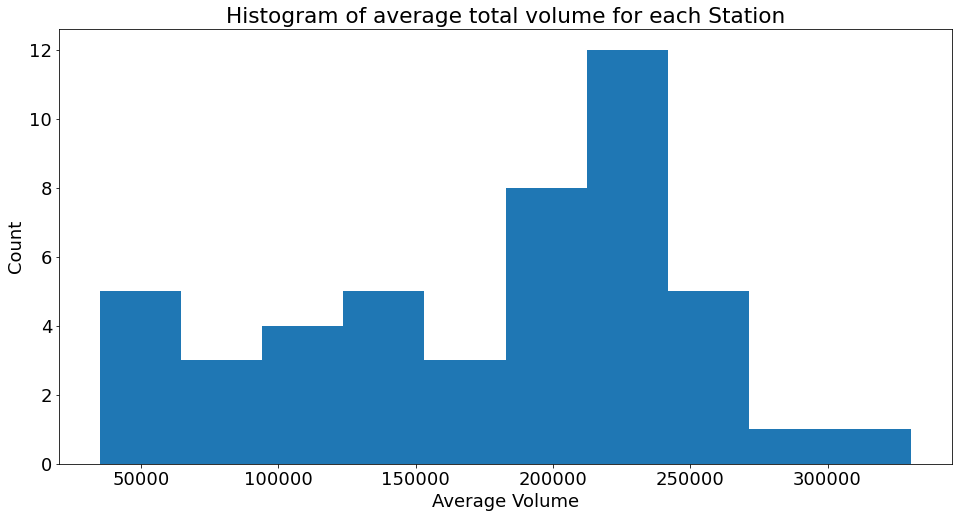

In [28]:
# Histogram plot of average total volume for each station
plt.figure(figsize=(16,8))
plt.hist(df.groupby('station_id')['total_volume'].mean(),bins = 10)
plt.xlabel('Average Volume')
plt.ylabel('Count')
plt.title('Histogram of average total volume for each Station')
plt.show()

Looking at a histogram plot of average traffic volume for each station. We see a relatively balanced distribution, the bulk of the station report traffic volumes around the 200,000 range. We will be exploring factors that affect traffic volume to better understand what causes these differences.

In [29]:
# Get list of hourly volume features
hourly_volume = df.columns[13:37]

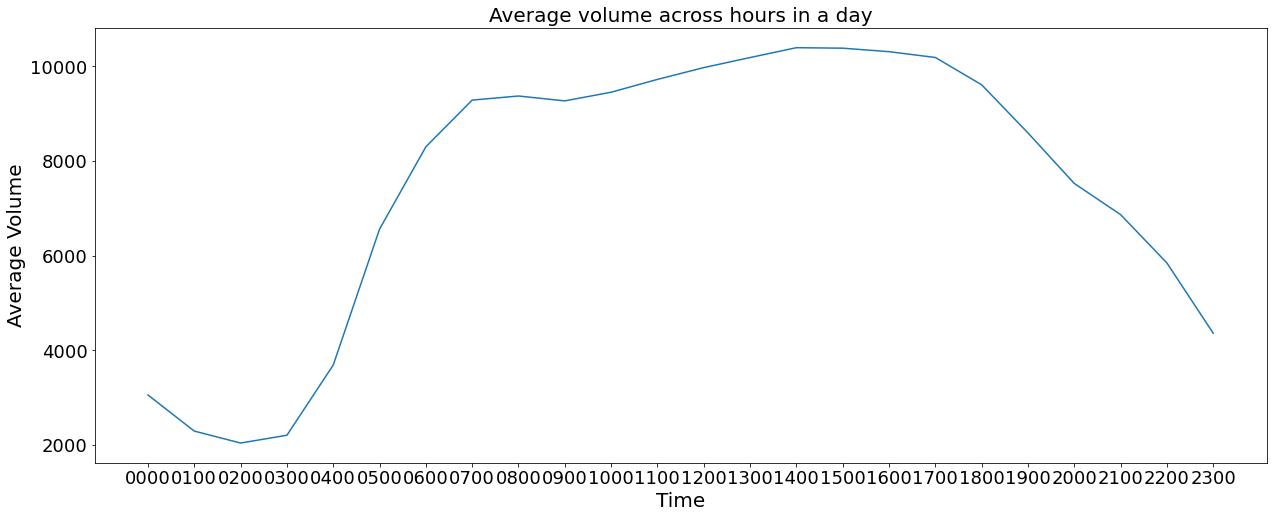

In [30]:
# Line plot of average total volume across hours in a day

plt.figure(figsize=(21,8))
plt.plot(hourly_volume,df[hourly_volume].mean(),)
plt.xlabel('Time',size =20)
plt.ylabel('Average Volume',size =20)
plt.title('Average volume across hours in a day',size =20)
plt.show()

In general, the traffic conditions in most locations follow the same pattern. Having low traffic before 0400 hours, which picks up quickly to about 9am. From 9am to 6pm, traffic conditions tend to stay the same or gradually pick up. 6pm onwards the traffic conditions winds down to the low levels. For this study, we will not be focusing on the variation of traffic in a day, but rather the average traffic across the day.

### Bivariate Analysis

The following section of the project focuses on finding features that correlates with traffic conditions.

In [31]:
# Creating function for bar graph (bivariate analysis)
def bar_plot(dataframe, x_axis, x_name, y_name, title_name):
    plt.figure(figsize = (16,8))
    dataframe.groupby(x_axis)['total_volume'].mean().plot.bar()
    plt.xlabel(x_name)
    plt.ylabel(y_name)
    plt.title(title_name,size =20)
    plt.show()

In [32]:
# Creating function for line graph for volume across hours(bivariate analysis)
def line_plot_hours(dataframe, x_axis, x_name, y_name, title_name):
    plt.figure(figsize = (20,8))
    for i in range(dataframe[x_axis].nunique()):
        dataframe.groupby(x_axis)[hourly_volume].mean().iloc[i].plot()
    plt.xlabel(x_name)
    plt.ylabel(y_name)
    plt.title(title_name)
    plt.legend(loc=1, prop={'size': 12})
    plt.show()

### 1) Day of week

In [33]:
# Check what day is this
df[df['date'] == dt.datetime(2015,1,1)]['day_of_week'].unique()

array([5], dtype=int64)

Day of week captures what day the observation was captured. With '1' representing Sunday and '7' representing Saturday. The common trend worldwide is that weekends will have lesser traffic than weekdays. This follows the typical business days of any country. The following diagrams explores if the data repeats this trend.

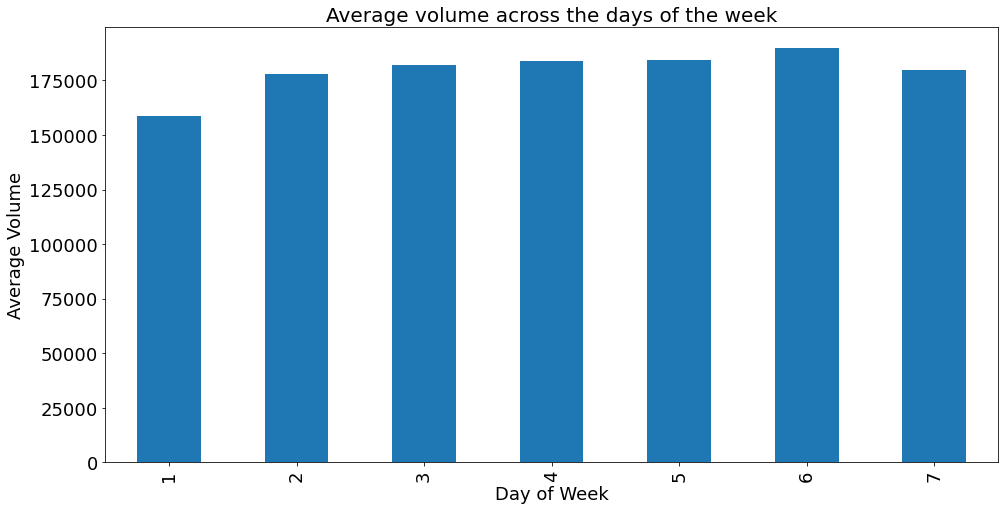

In [34]:
# Plot bar graph for average volume for different day of week
bar_plot(
    df,
    'day_of_week',
    'Day of Week',
    'Average Volume',
    'Average volume across the days of the week'
)

The average volume for Saturday (7) and Sunday (1) is lower than that of a weekday.

In [35]:
df['weekend'] = df['day_of_week'].map(lambda x: 1 if x == 1 or x == 7 else 0)

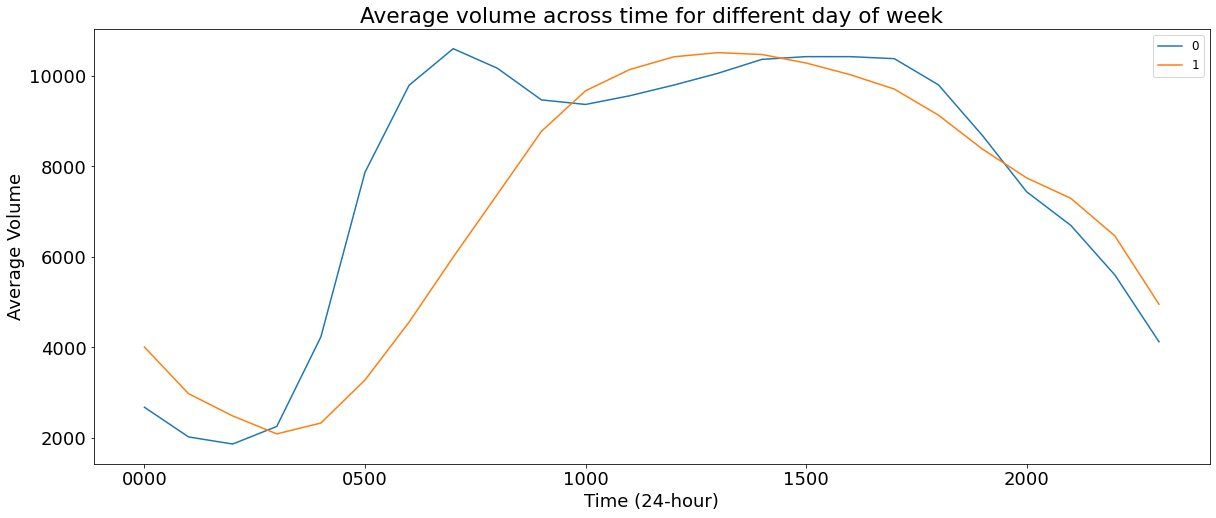

In [36]:
# Plot linegraph of average volume across time for different day of week
line_plot_hours(
    df,
    'weekend',
    'Time (24-hour)',
    'Average Volume',
    'Average volume across time for different day of week'
)

Looking at the linegraph for weekends represented by the orange line, we see that the traffic volume shows a different pattern than the weekdays. On the weekends, traffic gradually increases from 1am to 12pm then gradually falls to the end of the day.

### 2) Month

By examining the traffic volume across the months in a year, we can check for any seasonality effects. Los Angeles climate does not vary from month to month, so we expect climate factors to be minimal.

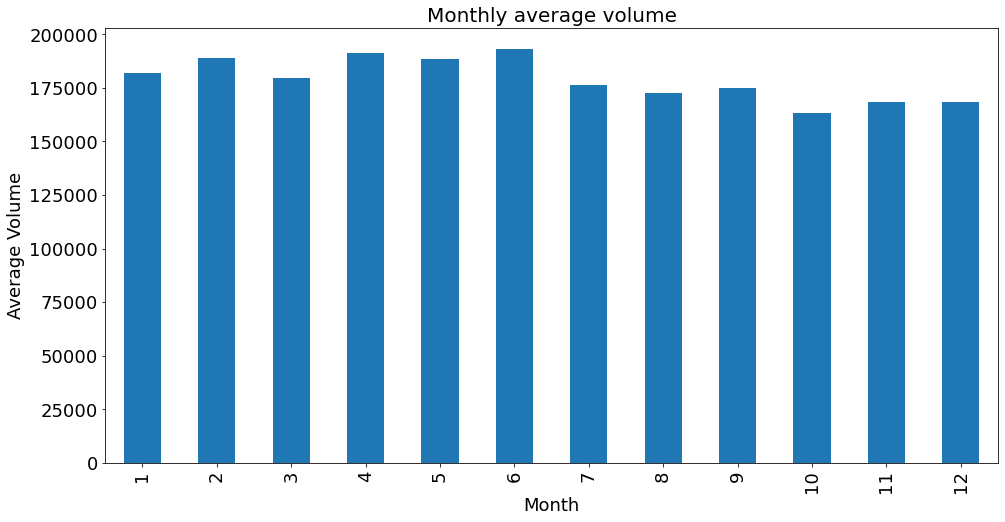

In [37]:
# Plot bar graph for average volume across different month
bar_plot(
    df,
    'month_of_data',
    'Month',
    'Average Volume',
    'Monthly average volume'
)

As shown in the diagram, we observed some seasonality factors in traffic volume, where it is lower from October to December as compared to other months.

### 3) Holiday

Similar to weekends, we should see a decrease in traffic volume during public holidays. 

In [38]:
# Get a dictionary of US (CA) Holidays
us_holidays = holidays.CountryHoliday('US', prov=None, state='CA')

In [39]:
# Feature engineer holiday feature
df['holiday'] = df['date'].map(lambda x: 1 if x in us_holidays else 0)

In [40]:
# Display holidays
us_holidays

{datetime.date(2015, 1, 1): "New Year's Day",
 datetime.date(2015, 1, 19): 'Martin Luther King Jr. Day',
 datetime.date(2015, 2, 15): 'Susan B. Anthony Day',
 datetime.date(2015, 2, 16): "Washington's Birthday",
 datetime.date(2015, 3, 31): 'César Chávez Day',
 datetime.date(2015, 5, 25): 'Memorial Day',
 datetime.date(2015, 7, 4): 'Independence Day',
 datetime.date(2015, 7, 3): 'Independence Day (Observed)',
 datetime.date(2015, 9, 7): 'Labor Day',
 datetime.date(2015, 10, 12): 'Columbus Day',
 datetime.date(2015, 11, 11): 'Veterans Day',
 datetime.date(2015, 11, 26): 'Thanksgiving',
 datetime.date(2015, 11, 27): 'Day After Thanksgiving',
 datetime.date(2015, 12, 25): 'Christmas Day'}

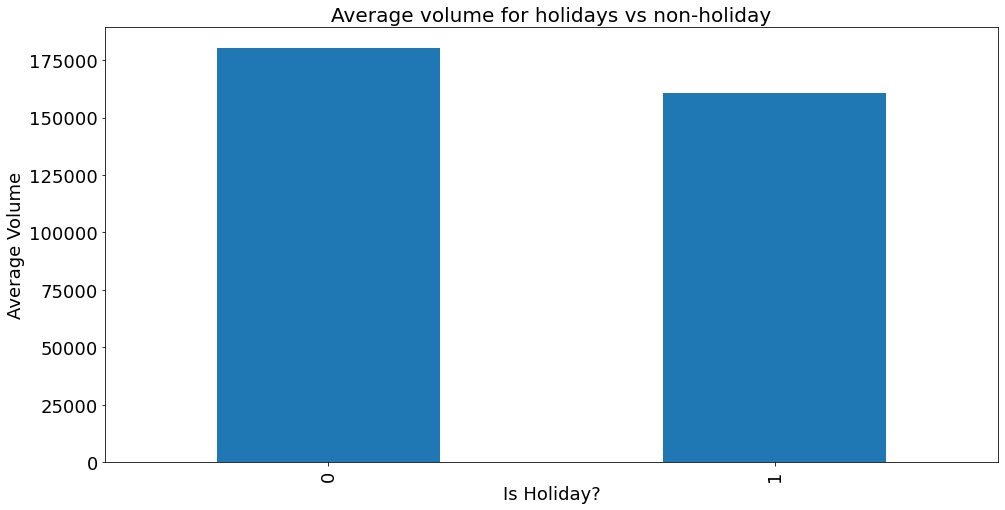

In [41]:
# Plot average volume for holidays vs non-holiday
bar_plot(
    df,
    'holiday',
    'Is Holiday?',
    'Average Volume',
    'Average volume for holidays vs non-holiday'
)

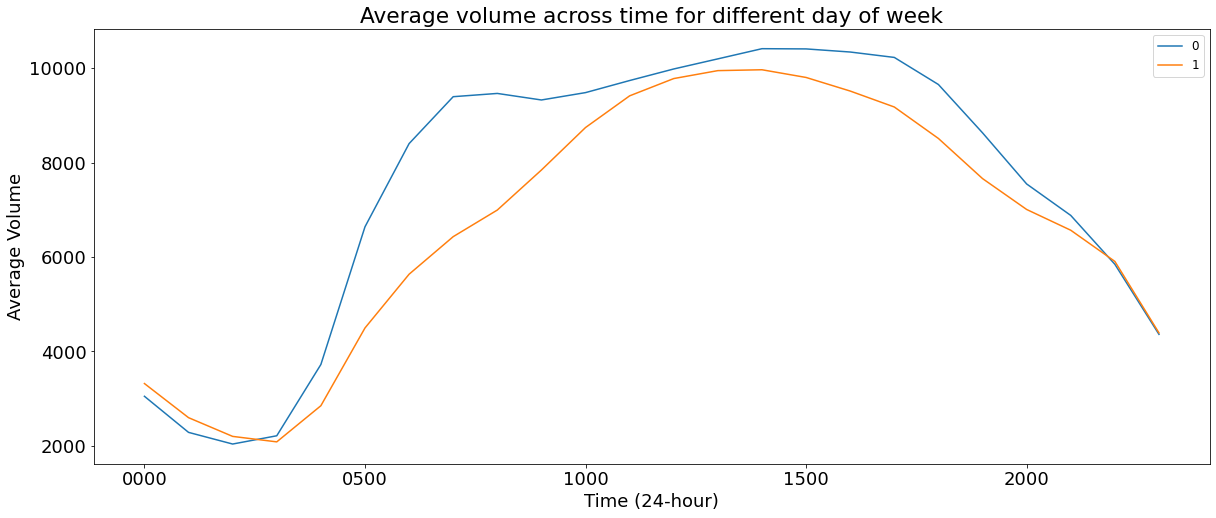

In [42]:
line_plot_hours(
    df,
    'holiday',
    'Time (24-hour)',
    'Average Volume',
    'Average volume across time for different day of week'
)

From the diagrams above, we see that the average volume is lower for public holidays versus non-holidays.

### 4) Functional Classification

The stations are split into different functional classifcation.

In [43]:
# Rename column for ease of reference
df.rename(columns = {
    'functional_classification_name_x':'functional_name'
}, inplace = True)

In [44]:
# List of functional classification
df['functional_name'].value_counts()

Urban: Principal Arterial - Interstate                       6706
Urban: Principal Arterial - Other Freeways or Expressways    2922
Urban: Principal Arterial - Other                             172
Rural: Principal Arterial - Interstate                        166
Name: functional_name, dtype: int64

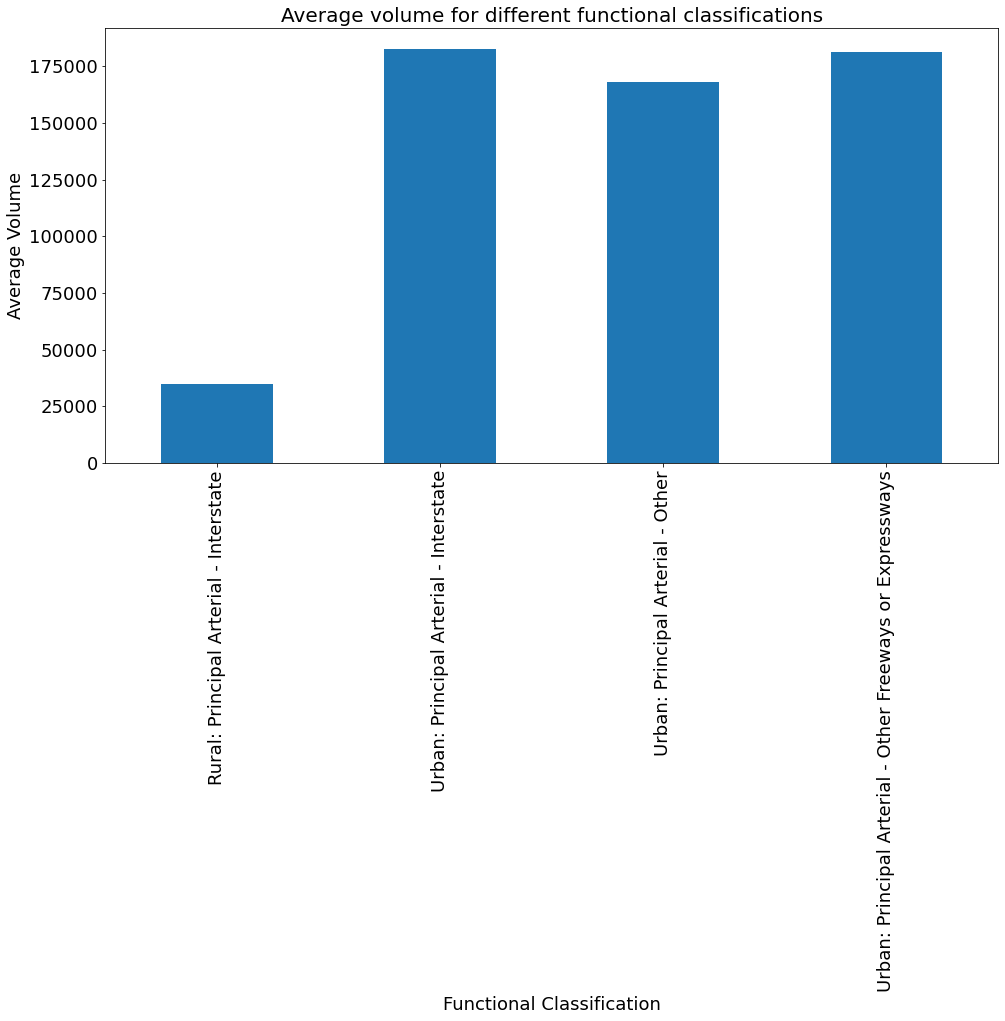

In [45]:
# Plot average volume for holidays vs non-holiday
bar_plot(
    df,
    'functional_name',
    'Functional Classification',
    'Average Volume',
    'Average volume for different functional classifications'
)

The main observation from this is that interstate roads have the highest average traffic volume. Los Angeles is a urban county, as such most observations are classified as urban.

In [46]:
# One hot encode dummy variable
df = pd.concat([df, pd.get_dummies(df['functional_classification'])], axis=1)

### 5) Road Capacity

Needless to say, typically larger roads will have larger traffic volume.

We feature engineered a feature, travel_directions, this can be used as a proxy to measure road capacity as larger roads are typically bidirectional.

Another feature comes to mind, number of lanes monitored for traffic volume. This is a good estimate of the number of lanes on the road.

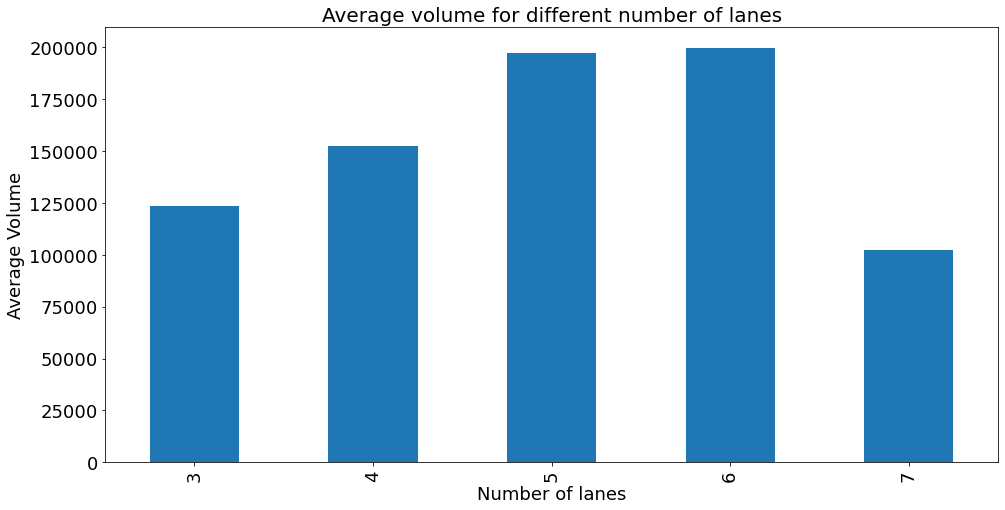

In [47]:
# Plot average volume for number of lanes
bar_plot(
    df,
    'number_of_lanes_monitored_for_traffic_volume',
    'Number of lanes',
    'Average Volume',
    'Average volume for different number of lanes'
)

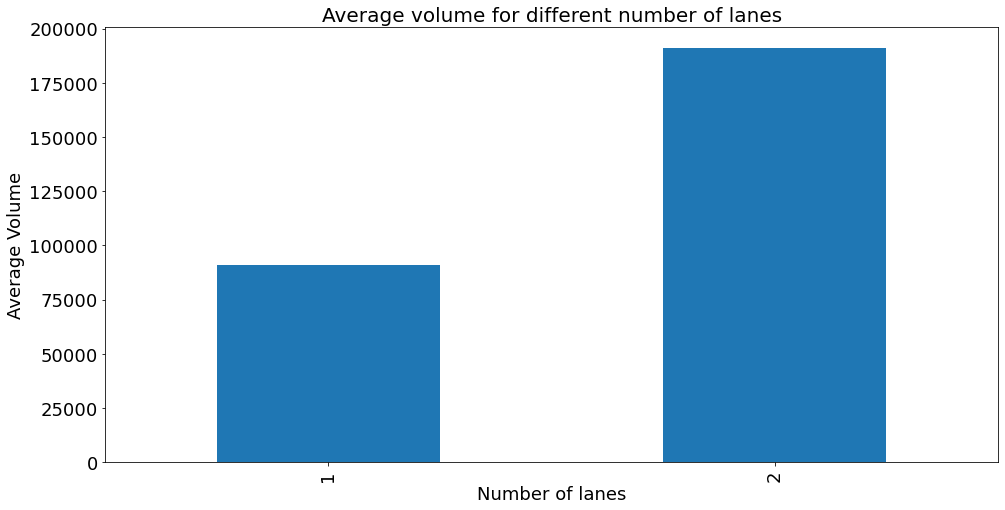

In [48]:
# Plot average volume for bidirectional lanes vs otherwise
bar_plot(
    df,
    'travel_directions',
    'Number of lanes',
    'Average Volume',
    'Average volume for different number of lanes'
)

For both features, the more road capacity the larger the traffic volume on average is.

In [49]:
# Create dummy variable for multiple lanes
df['bidirectional'] = df['travel_directions'].map(lambda x: 1 if x == 2 else 0)

### Other features - Weather

Thus far, we have features that capture the variation in the date of observation and features that capture the variation between stations. Unfortunately within the dataset there are not much features that capture the day to day variation in traffic volume. That is to say, there are no features that differentiate between the days. 

We look to improve our model by adding an weather data. This dataset is retrieved from (https://www.weather.gov/lox/observations_historical). It captures Los Angeles weather data and has in its dataset temperature and precipitation.

The hypothesis is that with adverse weather conditions (high/ low temperature or rain) the more traffic there will be.

In [50]:
# Read weather dataset csv file
weather = pd.read_csv('dataset/KLAX_2015-2015.csv')

In [51]:
weather['date'] = pd.to_datetime(weather['Date'])

In [52]:
#Preview the weather dataset
weather.head()

Date     Time  altimeter_set_1  wind_gust_set_1  \
0  12/31/15  11:53PM        101794.79              NaN   
1  12/31/15  10:53PM        101794.79              NaN   
2  12/31/15  09:53PM        101828.66              NaN   
3  12/31/15  08:53PM        101896.38              NaN   
4  12/31/15  07:53PM        101964.11              NaN   

  pressure_change_code_set_1  cloud_layer_3_code_set_1  \
0                        NaN                       NaN   
1                        NaN                       NaN   
2                        NaN                       NaN   
3                        NaN                       NaN   
4                        NaN                       NaN   

   sea_level_pressure_set_1  sea_level_pressure_set_1d  peak_wind_speed_set_1  \
0                       NaN                  101791.77                    NaN   
1                  101800.0                  101790.21                    NaN   
2                  101820.0                  101824.08                    NaN   
3                  101890.0                  101891.80                    NaN   
4                  101960.0                  101959.52                    NaN   

   cloud_layer_1_code_set_1  air_temp_low_6_hour_set_1  \
0                    2506.0                        NaN   
1                    2506.0                        NaN   
2                    1806.0                        NaN   
3                    1606.0                        NaN   
4                    1606.0                        NaN   

   air_temp_high_24_hour_set_1  precip_accum_one_hour_set_1  \
0                          NaN                          NaN   
1                          NaN                          NaN   
2                          NaN                          NaN   
3                          NaN                          NaN   
4                          NaN                          NaN   

   peak_wind_direction_set_1  pressure_tendency_set_1  ceiling_set_1  \
0                        NaN                      NaN            NaN   
1                        NaN                      NaN            NaN   
2                        NaN                      NaN            NaN   
3                        NaN                   8023.0            NaN   
4                        NaN                      NaN            NaN   

   cloud_layer_2_code_set_1  relative_humidity_set_1  wind_speed_set_1  \
0                       NaN                    27.28             11.50   
1                       NaN                    18.96              0.00   
2                       NaN                    17.56              3.44   
3                       NaN                    17.56              3.44   
4                       NaN                    18.96              0.00   

   precip_accum_24_hour_set_1  precip_accum_three_hour_set_1  air_temp_set_1  \
0                         NaN                            NaN            62.6   
1                         NaN                            NaN            64.4   
2                         NaN                            NaN            64.4   
3                         NaN                            NaN            64.4   
4                         NaN                            NaN            64.4   

   air_temp_high_6_hour_set_1         date_time  dew_point_temperature_set_1d  \
0                         NaN  12/31/15-11:53PM                         28.26   
1                         NaN  12/31/15-10:53PM                         21.09   
2                         NaN  12/31/15-09:53PM                         19.31   
3                         NaN  12/31/15-08:53PM                         19.31   
4                         NaN  12/31/15-07:53PM                         21.09   

   visibility_set_1  dew_point_temperature_set_1  air_temp_low_24_hour_set_1  \
0              10.0                         28.4                         NaN   
1              10.0                         21.2                         NaN   
2       

In [53]:
# Convert date to datetime
weather['date'] = pd.to_datetime(weather['Date'])

In [56]:
# Feature engineer weather data for dates
weather = weather.groupby('date').agg({'air_temp_set_1': 'mean',
                                       'precip_accum_24_hour_set_1':'max'})

weather['rain'] = weather['precip_accum_24_hour_set_1'].map(lambda x: 1 if x > 0 else 0)
weather['avg_temp'] = weather['air_temp_set_1']
weather = weather.loc[:,('rain','avg_temp')]

In [59]:
# Merge weather with traffic dataset
df = df.merge(
    weather,
    how = 'left',
    on = 'date'
)

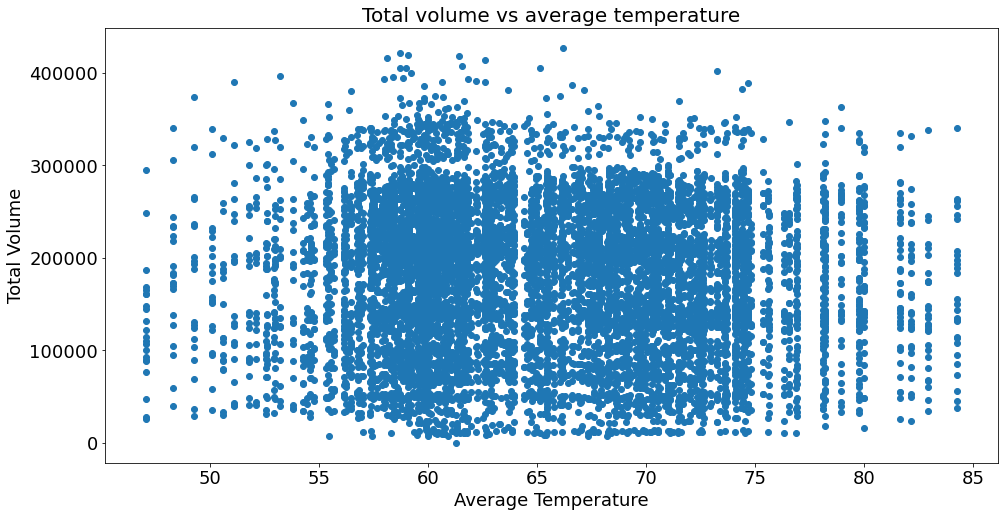

In [60]:
# Plot scatter plot of average temperature
plt.figure(figsize = (16,8))
plt.scatter(df['avg_temp'],df['total_volume'])
plt.xlabel('Average Temperature')
plt.ylabel('Total Volume')
plt.title('Total volume vs average temperature',size =20)
plt.show()

No clear sign of relationship between traffic and temperature.

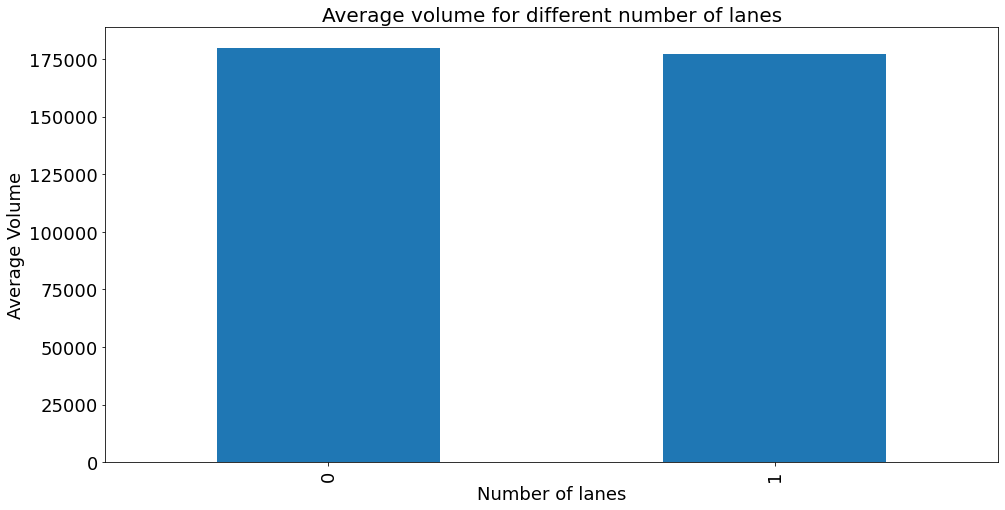

In [61]:
# Plot average volume for bidirectional lanes vs otherwise
bar_plot(
    df,
    'rain',
    'Number of lanes',
    'Average Volume',
    'Average volume for different number of lanes'
)

No clear relationship between rain and traffic volume.

In [62]:
# Correlation matrix of weather data with traffic volume
df[['total_volume','avg_temp','rain']].corr()

total_volume  avg_temp      rain
total_volume      1.000000 -0.042996 -0.009119
avg_temp         -0.042996  1.000000 -0.121836
rain             -0.009119 -0.121836  1.000000

Looking at the correlation matrix of temperature, rain and traffic volume. We see that the variables are hardly correlated. This works against the hypothesis that weather conditions affect traffic data. Los Angeles has relatively stable climates, it rains roughly 30 times a year and temperature does not vary across the seasons. As such weather might not be a good feature to predict for traffic volume.

### EDA Summary

To summarize our findings:

1) Traffic volume is on average lower on the weekends than on weekdays.

2) Traffic volume have a slight seasonal pattern as it tapers down towards December

3) Traffic volume is on average lower on days that are public holidays

4) Traffic volume is higher for interstate roads

5) Traffic volume is typically higher for roads that have more capacity (bidirectional roads and roads with more lanes).

<a id='modelling'></a>
# Modelling

To model for traffic volume, we use sklearn's Random Forest Regression, Ridge Regression and Support Vector Machine algorithms.

In this section we will gridsearch across suitable hyperparamters to find the optimal model.

In [63]:
from sklearn.model_selection import (train_test_split, cross_val_score, GridSearchCV)
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error 
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import  RandomForestRegressor
from sklearn.svm import SVR

In [64]:
# Target variable
target = 'total_volume'

In [65]:
# Features in the model
features = [
    'weekend',
    'holiday',
    'bidirectional',
    'number_of_lanes_monitored_for_traffic_volume',
    'month_of_data',
    '1R',
    '2U',
    '3U',
]

In [66]:
# Set dependent and independent variables
X = df[features]
y = df[target]

# Train test split
X_train, X_holdout, y_train, y_holdout  = train_test_split(X, y, random_state = 25, train_size = 0.75)

In [67]:
# Scale the data
ss = StandardScaler()
X_train_s = ss.fit_transform(X_train)
X_holdout_s = ss.transform(X_holdout)


#### Hyperparameters:
##### Random Forest Regression:

max_depth -> The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples. The lower the depth the less variance the model will have, it will also increase the bias.

n_estimators -> The number of trees in the forest. The less trees, the lower the variance of the model.

max_features -> The number of features to consider when looking for the best split. 

##### Ridge Regression:

alpha -> The strength of regularization in the model. Alpha of 0 is simple linear regression.

##### Support Vector Regression:

kernal -> Specifies the kernal trick to be used.

C -> Inverse of regularization strength, smaller values have more regularisation, regularisation will reduce the variance of the model.



In [68]:
# Set hyperparameters for Random Forest Regression
rf_params = {
    'criterion': ['mse'],
    'n_estimators' : [100,500,1000],
    'max_depth': [None, 5, 10],
    'max_features': ['sqrt', 'log2'],
    'random_state' : [42]
}
# Set hyperparameters for Ridge Regression
rr_params = {
    'alpha': [0.0, 1e-3, 1e-1, 1,10],
    'random_state' : [42],
    'max_iter' : [1000]
}
# Set hyperparameters for Support Vector Machines
svm_params = {
    'kernel': ['linear','poly','rbf'],
    'C': [1,10,100]
}

In [69]:
# Instantiate Gridsearch for Random Forest Regression
rf_gs = GridSearchCV(
    RandomForestRegressor(),
    rf_params,
    cv = 5,
    verbose = 1,
    n_jobs = -1, 
)

# Instantiate Gridsearch for Random Forest Regression
rr_gs = GridSearchCV(
    Ridge(),
    rr_params,
    cv = 5,
    verbose = 1,
    n_jobs = -1, 
)

# Instantiate Gridsearch for Random Forest Regression
svm_gs = GridSearchCV(
    SVR(),
    svm_params,
    cv = 5,
    verbose = 1,
    n_jobs = -1, 
)

In [70]:
# Fit the gridsearch
rf_gs.fit(X_train_s, y_train)
rr_gs.fit(X_train_s, y_train)
svm_gs.fit(X_train_s, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 9 candidates, totalling 45 fits


GridSearchCV(cv=5, estimator=SVR(), n_jobs=-1,
             param_grid={'C': [1, 10, 100],
                         'kernel': ['linear', 'poly', 'rbf']},
             verbose=1)

In [71]:
# Get cross validation score for best paramethers
rf_rmse = -cross_val_score(
    rf_gs.best_estimator_,
    X_holdout, y_holdout,
    scoring="neg_root_mean_squared_error",
    cv=5).mean()

rr_rmse = -cross_val_score(
    rr_gs.best_estimator_,
    X_holdout, y_holdout,
    scoring="neg_root_mean_squared_error",
    cv=5).mean()

svm_rmse = -cross_val_score(
    svm_gs.best_estimator_,
    X_holdout, y_holdout,
    scoring="neg_root_mean_squared_error",
    cv=5).mean()

In [72]:
# Compare cross-validation score
print(f'Random Forest RMSE: {rf_rmse}\nRidge Regression RMSE: {rr_rmse} \nSupport Vector Machine RMSE: {svm_rmse}')

Random Forest RMSE: 57411.14706223262
Ridge Regression RMSE: 63601.3803802204 
Support Vector Machine RMSE: 71580.42802624001


From the cross validation scores, the best model is Random Forest Regression.

In [73]:
# Instantiate and fit the best model
rf = RandomForestRegressor()

rf.set_params(**rf_gs.best_params_)

rf.fit(X_train,y_train)

RandomForestRegressor(max_depth=10, max_features='log2', n_estimators=1000,
                      random_state=42)

### Random Forest feature importance

In the Random Forest Regressor algorithm, feature importance (or gini importance) is the feature's average impurity decrease calculated from all decision trees in the forest. When the decision tree is figuring out which split to make at a given node, it picks the split that maximizes the drop in gini impurity from the parent node to the child node. Therefore a higher feature importance shows how strong of a predictor that feature is.

In [74]:
# Get features importance in dictionary
important_features_dict = {}
for idx, val in enumerate(rf.feature_importances_):
    important_features_dict[idx] = val

# Sort values of feature importance    

important_features_list = sorted(important_features_dict,
                                 key=important_features_dict.get,
                                 reverse=True)

# Create list of sorted values
imp_features = []
importance = []
for i in important_features_list:
    imp_features.append(X_train.columns[i])
    importance.append(important_features_dict[i])

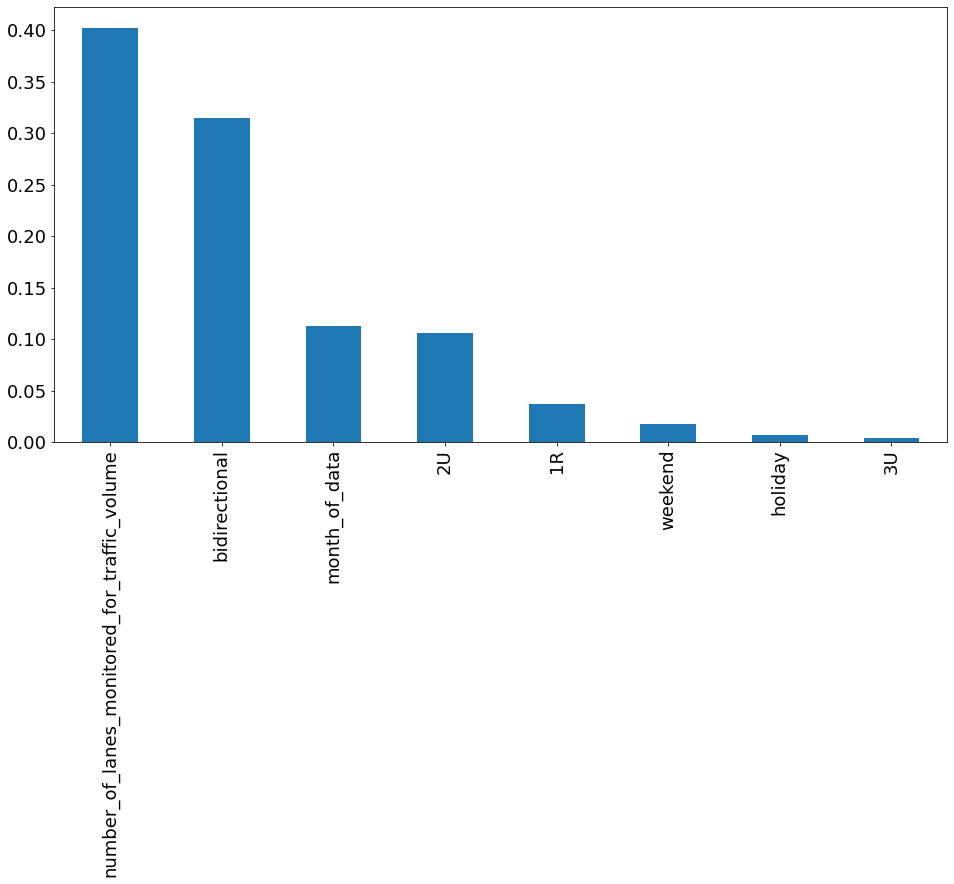

In [75]:
# Plot feature importance

plt.figure(figsize = (16,8))
forest_importances = pd.Series(importance, index= imp_features)
forest_importances.plot.bar();

From the diagram, we see that the 2 features with high feature importance are related to road capacity. A point to note is that the model is heavily reliant on the 2 features, this hints that the model is lacking in higher quality features.

### Predicting holdout dataset

In [76]:
rf.predict(X_holdout)

array([131368.1702601 , 207166.2987572 , 144580.54822244, ...,
       215312.1726928 , 177233.13578451, 154027.06711486])

In [77]:
# Get RMSE of best model
np.sqrt(mean_squared_error(y_holdout, rf.predict(X_holdout)))

56646.181031972636

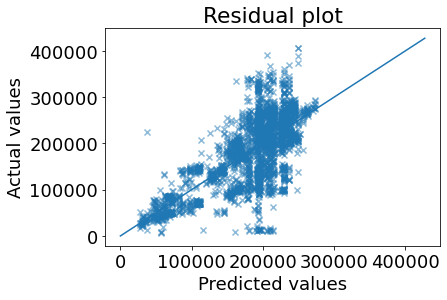

In [78]:
ax = plt.axes()
ax.plot(np.linspace(0,max(y)),np.linspace(0,max(y)))
ax.scatter(rf.predict(X_holdout), y_holdout, marker = "x", alpha = 0.5)
ax.set(xlabel = 'Predicted values', ylabel = 'Actual values', title = 'Residual plot');


The diagram above shows the predictions made on the holdout set compared to the actual values. The model performs badly when predicting large values. More information is required for the model for it to improve its prediction.

<a id='c&e'></a>
# Conclusion and Evaluation

### Conclusion

In this project, we extracted Los Angeles traffic data from the 2015 US traffic dataset to examine for patterns in the traffic data. From the data, we uncovered that:

1) Traffic volume is on average lower on the weekends than on weekdays.

2) Traffic volume have a slight seasonal pattern as it tapers down towards December

3) Traffic volume is on average lower on days that are public holidays

4) Traffic volume is higher for interstate roads

5) Traffic volume is typically higher for roads that have more capacity (bidirectional roads and roads with more lanes).

With these patterns, we attempted to use the features to model for traffic volume. After grid searching, we found that the Random Forest Regressor algorithm performed the best, with a Root Mean Squared Error of 56646.18.

This model however fails to predict for larger values, however may serve as a preliminary model to model for Los Angeles traffic.

### Evaluation

#### Improvements:

The features selected in this project were very dependent on the station information. Apart from the date related features, not much of the day to day variation in traffic can be captured. This project attempted to resolve the issue by looking at weather data, however, temperature and rain has a weak relationship with traffic volume.

#### Further work:

Perhaps it was a fool's errand to attempt to model Los Angeles average daily traffic data across different stations. A more sensible approach to model traffic conditions is to conduct a time series analysis (ARIMAX model) on a particular station with a complete set of information.